# Poisonous Fungi Predicitive Analysis Using Scikit-Learn

We already did some data reformatting in the previous assignment, so we can just copy most of the same code below before we begin. I am going to make a few changes, mostly because `scikit-learn` and it's functions interprets the numerical categroical columns as essentially being weighted. My goal is to have a pandas dataframe with the following structure: 

| Poisonous | Odor | Cape Shape |
| ----------| ---- | ---------- |
|     0     |  a   |     r      | 

Event though we previously mapped every column to numerics, keeping the odor and cap shape columns as strings will actually help later when we have to use the `pandas` method `get_dummies()`

In [41]:


import pandas as pd
import numpy as np



df = pd.read_csv('agaricus-lepiota.data', header=None)

df = df.rename(columns={0: 'Poisonous', 5: 'Odor', 1: 'Cap Shape'})

subset = df[['Poisonous', 'Odor', 'Cap Shape']].copy()

poisonous = {'p': 1, 'e':0}
subset['Poisonous'] = subset['Poisonous'].map(poisonous)

subset.head(10)

,Poisonous,Odor,Cap Shape
0,1,p,x
1,0,a,x
2,0,l,b
3,1,p,x
4,0,n,x
5,0,a,x
6,0,a,b
7,0,l,b
8,1,p,x
9,0,a,b


This looks pretty good. The next step is converting odor and cap shape into relevant numerical values for `scikit-learn`. Previously, we mapped it directly to numbers ex. 0-5 for cap shape, but `scikit-learn` functions will inerpret these as measurements instead of categories. In order to get around this, we need to use the `get_dummies()` method from `pandas`. This will add columns for every possible cap shape, with values being either 1 or 0 (a 1 indicating which cap shape the sample is, while every other cap shape column should be 0). Let's try it. 

In [42]:
cap_shape_x = pd.get_dummies(subset['Cap Shape'])
cap_shape_x.head(10)

,b,c,f,k,s,x
0,False,False,False,False,False,True
1,False,False,False,False,False,True
2,True,False,False,False,False,False
3,False,False,False,False,False,True
4,False,False,False,False,False,True
5,False,False,False,False,False,True
6,True,False,False,False,False,False
7,True,False,False,False,False,False
8,False,False,False,False,False,True
9,True,False,False,False,False,False


This looks a little different than we expected: the values are True and False rather than 1 or 0. After some research, this seems to be the result of just a display issue, and even if it's not, `scikit-learn` should still work as we want with boolean values in this case. Let's do the same manipulation for our Odor column, and set up our Poisonous column as our y values while we're at it. 

In [43]:
odor_x = pd.get_dummies(subset['Odor'])

y = subset['Poisonous']

print(y.head(10))
print(odor_x.head(10))
print(cap_shape_x.tail(10))


0    1
1    0
2    0
3    1
4    0
5    0
6    0
7    0
8    1
9    0
Name: Poisonous, dtype: int64
       a      c      f      l      m      n      p      s      y
0  False  False  False  False  False  False   True  False  False
1   True  False  False  False  False  False  False  False  False
2  False  False  False   True  False  False  False  False  False
3  False  False  False  False  False  False   True  False  False
4  False  False  False  False  False   True  False  False  False
5   True  False  False  False  False  False  False  False  False
6   True  False  False  False  False  False  False  False  False
7  False  False  False   True  False  False  False  False  False
8  False  False  False  False  False  False   True  False  False
9   True  False  False  False  False  False  False  False  False
          b      c      f      k      s      x
8114  False  False   True  False  False  False
8115  False  False  False  False  False   True
8116  False  False  False   True  False  Fal

Now that we have our two variables set up that we want to test and our response variable (the Poisonous column), we can go ahead and start our predictive analysis. Rather than manually work from the beginning, I'm going to take inspiration from Kevin Markham's video series [Machine Learning with scikit-learn](https://www.youtube.com/playlist?list=PL5-da3qGB5ICeMbQuqbbCOQWcS6OYBr5A) and use a few higher level built in functions that `scikit-learn` offers. 

We're going to first decide to use the K-nearest neighbors classification model. Our dataset isn't big enough to worry about computational costs in this case, and since we only have two dimensions to worry about (which we'll end up splitting up anyway), we don't need to worry about the curse of dimensionality. 

We'll want to use K-fold cross-validation in order to pick the best model available, as well as utilizing `GridSearchCV` to find out which value for k_neighbors gives us the best model. Let's get started.

0.5290552536067231
{'n_neighbors': 2}
KNeighborsClassifier(n_neighbors=2)
0.5242029106251652


Text(0, 0.5, 'Cross-Validated Accuracy')

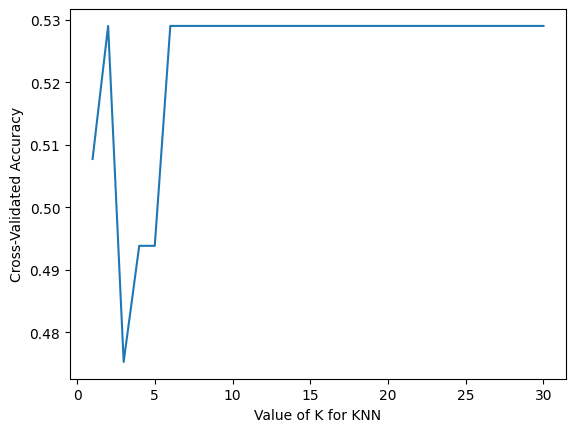

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline

knn = KNeighborsClassifier()
k_range = range(1, 31)

param_grid = dict(n_neighbors=k_range)

grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', n_jobs=-1)

grid.fit(cap_shape_x, y)

print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

cap_shape_grid_mean_scores = [grid.cv_results_['mean_test_score']]
print(np.mean(cap_shape_grid_mean_scores))

plt.plot(k_range, cap_shape_grid_mean_scores[0])
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

This doesn't give us the upside down U shape that we usually see. Let's try increasing the k-range. (I did some pre-testing, so if your computer can't handle the computing or you don't want to wait, skip executing the next cell. Using a k-range of 1000 we find the bets model at k = 324 with a value of 0.5623086058446791) I'm going to comment out the code in case it auto runs or someone chooses to run all cell. 

In [45]:
# knn = KNeighborsClassifier()
# k_range = range(1, 1000)

# param_grid = dict(n_neighbors=k_range)

# grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', n_jobs=-1)

# grid.fit(cap_shape_x, y)

# print(grid.best_score_)
# print(grid.best_params_)
# print(grid.best_estimator_)

# cap_shape_grid_mean_scores = [grid.cv_results_['mean_test_score']]
# print(cap_shape_grid_mean_scores)

# plt.plot(k_range, cap_shape_grid_mean_scores[0])
# plt.xlabel('Value of K for KNN')
# plt.ylabel('Cross-Validated Accuracy')

I'm not sure the computational time is worth the result here, so we can just stick with the initial range and result. Let's do the same Grid Search process for Odor. 

0.9537356321839081
{'n_neighbors': 1}
KNeighborsClassifier(n_neighbors=1)
0.953735632183908


Text(0, 0.5, 'Cross-Validated Accuracy')

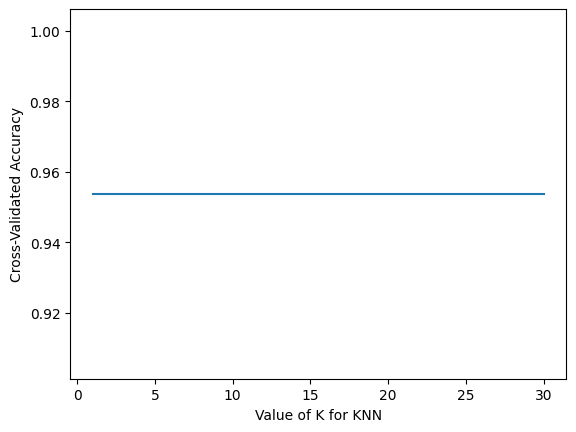

In [46]:
knn = KNeighborsClassifier()
k_range = range(1, 31)

param_grid = dict(n_neighbors=k_range)

odor_grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', n_jobs=-1)

odor_grid.fit(odor_x, y)

print(odor_grid.best_score_)
print(odor_grid.best_params_)
print(odor_grid.best_estimator_)

odor_grid_mean_scores = [odor_grid.cv_results_['mean_test_score']]
print(np.mean(odor_grid_mean_scores))

plt.plot(k_range, odor_grid_mean_scores[0])
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

This looks immediately looks like we can say that Odor is definitively a better indicator of being poisonous than cap shape is, but let's look at some final numbers. 

In [47]:
print(f"Best score using Cap Shape: {grid.best_score_}")
print(f"Best score using Odor: {odor_grid.best_score_}")
print(f"Mean of Cap Shape scores: {np.mean(cap_shape_grid_mean_scores)}")
print(f"Mean of Odor scores: {np.mean(odor_grid_mean_scores)}")

Best score using Cap Shape: 0.5290552536067231
Best score using Odor: 0.9537356321839081
Mean of Cap Shape scores: 0.5242029106251652
Mean of Odor scores: 0.953735632183908


We can see here that both in the best possible K-nearest neighbors model and the average result across neighbor number models, Odor is a better indicator of being poisonous for the Agaricus and Lepiota families than Cap Shape is, and by a large margin too. 